In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
import matplotlib.pyplot as plt

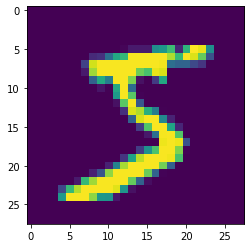

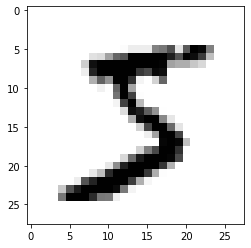

In [6]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap= plt.cm.binary)

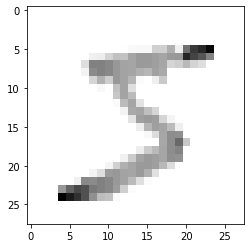

In [7]:
x_train = tf.keras.utils.normalize (x_train, axis=1)
x_test = tf.keras.utils.normalize (x_test, axis=1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [8]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [9]:
y_train[0]

5

In [10]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print( "Training Sample Dimension", x_trainr.shape)
print( "Testing Sample Dimension", x_testr.shape)

Training Sample Dimension (60000, 28, 28, 1)
Testing Sample Dimension (10000, 28, 28, 1)


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [12]:
model = Sequential()

model.add(Conv2D(64 ,(3,3), input_shape = x_trainr.shape[1:] ))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add (Flatten())
model.add (Dense(64))
model.add (Activation("relu"))


model.add (Dense(32))
model.add (Activation("relu"))

model.add (Dense(10))
model.add (Activation("softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [14]:
print("Total training samples = ",len(x_trainr))

Total training samples =  60000


In [15]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [16]:
model.fit (x_train, y_train, epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 53s 39ms/step - loss: 0.3208 - accuracy: 0.8978 - val_loss: 0.1245 - val_accuracy: 0.9610
Epoch 2/5
1313/1313 [==============================] - 53s 40ms/step - loss: 0.0986 - accuracy: 0.9701 - val_loss: 0.0838 - val_accuracy: 0.9739
Epoch 3/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0689 - accuracy: 0.9781 - val_loss: 0.0676 - val_accuracy: 0.9799
Epoch 4/5
1313/1313 [==============================] - 50s 38ms/step - loss: 0.0552 - accuracy: 0.9826 - val_loss: 0.0634 - val_accuracy: 0.9791
Epoch 5/5
1313/1313 [==============================] - 51s 38ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0618 - val_accuracy: 0.9807


In [17]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 test samples ",test_loss)
print("Validation accuracy on 10,000 test samples ",test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 0.0557 - accuracy: 0.9838
Test loss on 10,000 test samples  0.05569183826446533
Validation accuracy on 10,000 test samples  0.9837999939918518


In [18]:
predicions = model.predict([x_testr])

313/313 [==============================] - 3s 10ms/step


In [19]:
print(predicions)

[[6.31076791e-09 9.71405854e-08 2.94880465e-07 ... 9.99997735e-01
  7.52985674e-09 1.39847839e-06]
 [1.28289844e-06 9.42739398e-09 9.99992847e-01 ... 2.20128285e-07
  5.65536311e-06 1.83833657e-10]
 [2.85355355e-07 9.99993205e-01 9.12467669e-07 ... 2.00534501e-07
  1.00058355e-06 2.92144211e-08]
 ...
 [5.76039803e-08 1.75234948e-06 3.02755012e-07 ... 9.22803508e-07
  1.39634431e-05 1.37753144e-04]
 [2.59281910e-06 8.75410244e-10 1.79650712e-08 ... 2.86413222e-08
  1.06487205e-05 6.14795169e-07]
 [5.69566546e-05 1.30867858e-10 2.08726688e-05 ... 7.13181691e-08
  5.80753976e-06 1.04527089e-06]]


In [20]:
print(np.argmax(predicions[0]))

7


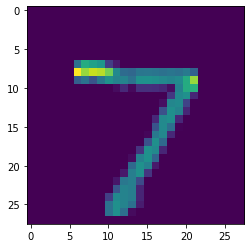

In [21]:
plt.imshow(x_test[0])

In [22]:
print (np.argmax(predicions[128]))

8


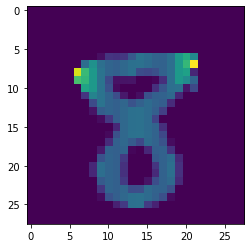

In [23]:
plt.imshow(x_test[128])

In [24]:
import cv2

In [26]:
img = cv2.imread("C:\\Users\\shubh\\Desktop\\Project To Submit\\captured_images\\6\\1.png")

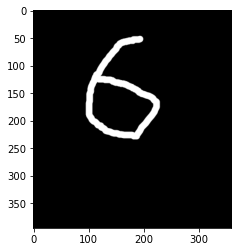

In [27]:
plt.imshow(img)

In [28]:
img.shape

(395, 360, 3)

In [29]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [30]:
gray.shape

(395, 360)

In [31]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [32]:
resized.shape

(28, 28)

In [33]:
newimg = tf.keras.utils.normalize (resized, axis= 1)

In [34]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [35]:
newimg.shape

(1, 28, 28, 1)

In [36]:
predictions = model.predict(newimg)

1/1 [==============================] - 0s 233ms/step


In [37]:
print (np.argmax(predictions))

9


In [38]:
def predict_custom_img(img,model):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)
    newimg = tf.keras.utils.normalize (resized, axis= 1)
    newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    predictions = model.predict(newimg)
    print (np.argmax(predictions))

In [39]:
img2=cv2.imread("C:\\Users\\shubh\\Desktop\\Project To Submit\\captured_images\\6\\7.png")

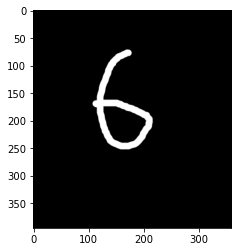

In [40]:
plt.imshow(img2)

In [41]:
model.save("C:\\Users\\shubh\\Desktop\\Project To Submit\\Models\\ModelE1.h5")

In [43]:
model2 = tf.keras.models.load_model("C:\\Users\\shubh\\Desktop\\Project To Submit\\Models\\ModelE1.h5")

In [44]:
predict_custom_img(img2,model2)

1/1 [==============================] - 0s 92ms/step
5


In [45]:
img3=cv2.imread("C:\\Users\\shubh\\Desktop\\Project To Submit\\captured_images\\2\\7.png")

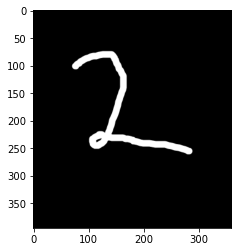

In [46]:
plt.imshow(img3)

In [47]:
predict_custom_img(img3,model2)

1/1 [==============================] - 0s 21ms/step
4


In [51]:
img4=cv2.imread("C:\\Users\\shubh\\Desktop\\Project To Submit\\captured_images\\2\\55.png")

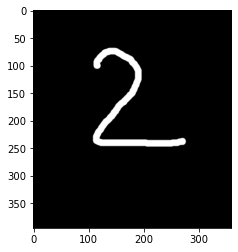

In [52]:
plt.imshow(img4)

In [53]:
predict_custom_img(img4,model2)

1/1 [==============================] - 0s 18ms/step
2
